<a href="https://colab.research.google.com/github/aryan-shukal/Data-Analysis-Projects/blob/main/Uber_Trip_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import Required Libraries***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [ ]:
# Load the dataset
file_path = '/content/Uber-Jan-Feb-FOIL.csv'
uber_data = pd.read_csv(file_path)
# Display the first few rows of the dataset
uber_data.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


# ***Data Preprocessing***

In [ ]:
# Convert 'date' to datetime format
uber_data['date'] = pd.to_datetime(uber_data['date'])

In [ ]:
# Extract additional features from 'date'
uber_data['Hour'] = uber_data['date'].dt.hour
uber_data['Day'] = uber_data['date'].dt.day
uber_data['Weekday'] = uber_data['date'].dt.weekday
uber_data['Month'] = uber_data['date'].dt.month

# ***Exploratory Data Analysis***

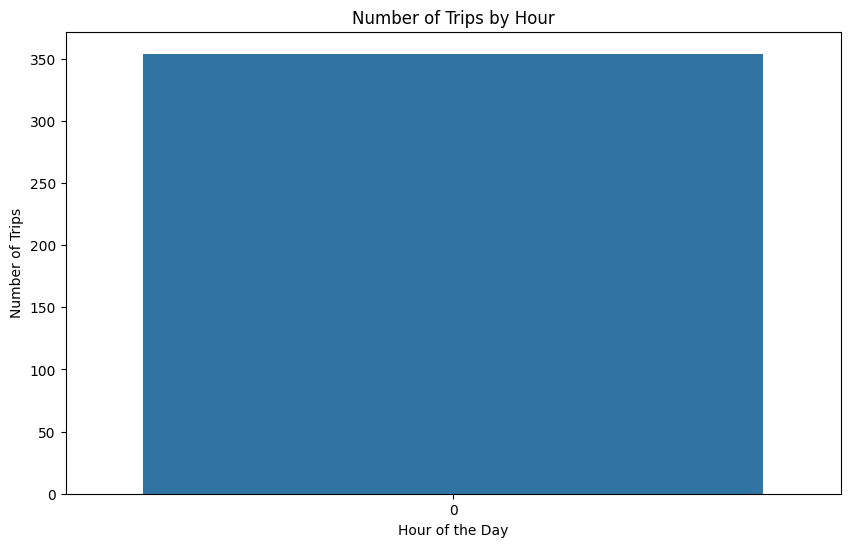

In [ ]:
# Plot the distribution of trips by hour
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data= uber_data)
plt.title('Number of Trips by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

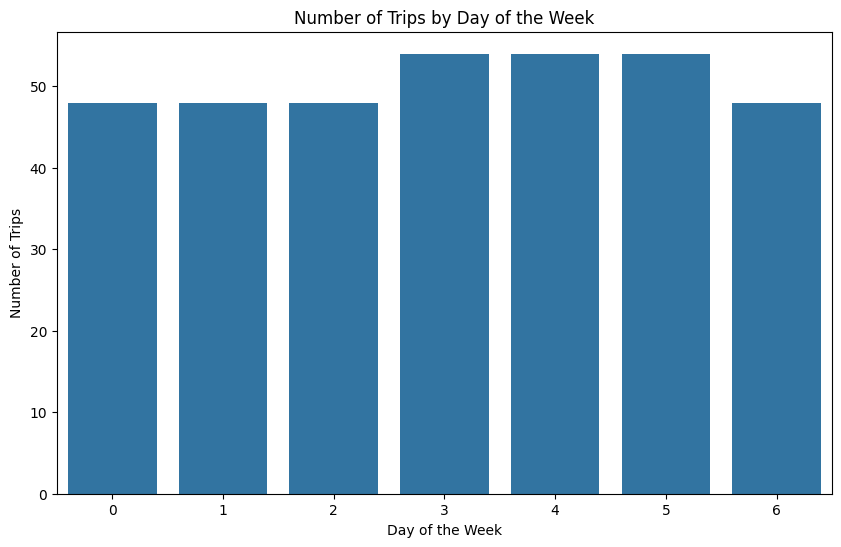

In [ ]:
# Plot the distribution of trips by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='Weekday', data=uber_data)
plt.title('Number of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()

# ***Feature Engineering***

In [ ]:
# Create a feature for weekend
uber_data['IsWeekend'] = uber_data['Weekday'].apply(lambda x: 1 if x >= 5 else 0)
# Create a feature for rush hour (assuming rush hours are 7-9 AM and 4-6 PM)
uber_data['IsRushHour'] = uber_data['Hour'].apply(lambda x: 1 if (7 <= x <= 9) or (16 <= x <= 18) else 0)

In [ ]:
# Display the first few rows to check the new features
uber_data.head()

,dispatching_base_number,date,active_vehicles,trips,Hour,Day,Weekday,Month,IsWeekend,IsRushHour
0,B02512,2015-01-01,190,1132,0,1,3,1,0,0
1,B02765,2015-01-01,225,1765,0,1,3,1,0,0
2,B02764,2015-01-01,3427,29421,0,1,3,1,0,0
3,B02682,2015-01-01,945,7679,0,1,3,1,0,0
4,B02617,2015-01-01,1228,9537,0,1,3,1,0,0


In [ ]:
# Define features and target variable
features = ['Hour', 'Day', 'Weekday', 'Month', 'IsWeekend', 'IsRushHour',]
X = uber_data[features]
y = uber_data['trips']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ***Model Building***

In [ ]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# ***Model Evaluation***

In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 157190746.0150748


# ***Visualization of Predictions***

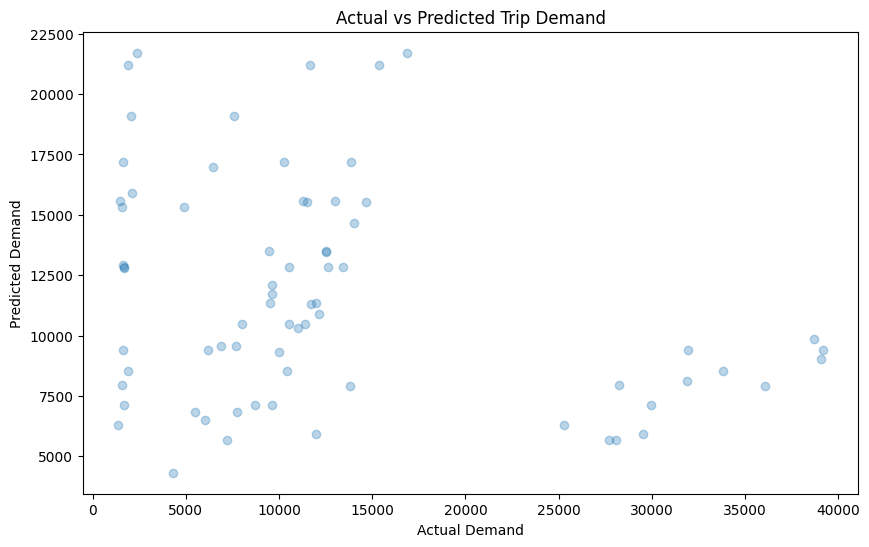

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.title('Actual vs Predicted Trip Demand')
plt.xlabel('Actual Demand')
plt.ylabel('Predicted Demand')
plt.show()

# ***Uber Trips Forecasting***

In [ ]:
# Define features and target variable
X = uber_data[['active_vehicles']]
y = uber_data['trips']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((283, 1), (71, 1), (283,), (71,))

In [ ]:
# Train the Gradient Boosting Trees (GBTR) model
gbtr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbtr_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Predict on the test set
gbtr_predictions = gbtr_model.predict(X_test)

In [ ]:
# Calculate the Mean Absolute Percentage Error (MAPE)
gbtr_mape = mean_absolute_percentage_error(y_test, gbtr_predictions)
gbtr_mape

0.11438541871667829

In [ ]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test set
rf_predictions = rf_model.predict(X_test)

In [ ]:
# Calculate the Mean Absolute Percentage Error (MAPE)
rf_mape = mean_absolute_percentage_error(y_test, rf_predictions)
rf_mape

0.13375523137756276

In [ ]:
# Further reduce the complexity of the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=30, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=30, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict on the test set
xgb_predictions = xgb_model.predict(X_test)

In [ ]:
# Calculate the Mean Absolute Percentage Error (MAPE)
xgb_mape = mean_absolute_percentage_error(y_test, xgb_predictions)
xgb_mape

0.11595531684188447

In [ ]:
# Create an ensemble model using Voting Regressor
ensemble_model = VotingRegressor(estimators=[
    ('xgb', xgb_model),
    ('gbtr', gbtr_model),
    ('rf', rf_model)
])

In [ ]:
# Train the ensemble model
ensemble_model.fit(X_train, y_train)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...one,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=3,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=30,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=42, ...)),
                            ('gbtr',
                             GradientBoostingRegressor(random_state=42)),
                            ('rf', RandomForestRegressor(random_state=42))])

In [ ]:
# Predict on the test set
ensemble_predictions = ensemble_model.predict(X_test)

In [ ]:
# Calculate the Mean Absolute Percentage Error (MAPE) for the ensemble model
ensemble_mape = mean_absolute_percentage_error(y_test, ensemble_predictions)
ensemble_mape

0.11667208722697889

In [ ]:
# Display the MAPE for each model
print("Model Performance (MAPE):")
print(f"XGBoost MAPE: {xgb_mape:.2%}")
print(f"Gradient Boosting Trees (GBTR) MAPE: {gbtr_mape:.2%}")
print(f"Random Forest MAPE: {rf_mape:.2%}")
print(f"Ensemble Model MAPE: {ensemble_mape:.2%}")

Model Performance (MAPE):
XGBoost MAPE: 11.60%
Gradient Boosting Trees (GBTR) MAPE: 11.44%
Random Forest MAPE: 13.38%
Ensemble Model MAPE: 11.67%


In [ ]:
# Model names and their corresponding MAPE values
models = ['XGBoost', 'GBTR', 'Random Forest', 'Ensemble']
mape_values = [xgb_mape, gbtr_mape, rf_mape, ensemble_mape]

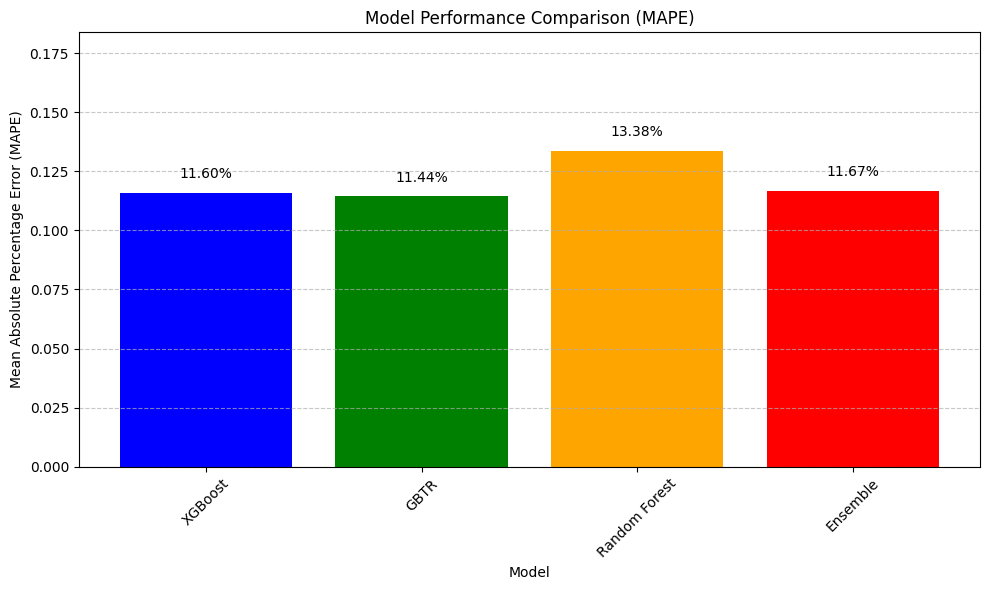

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, mape_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Performance Comparison (MAPE)')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Percentage Error (MAPE)')
plt.ylim(0, max(mape_values) + 0.05)  # Add some space above the highest bar
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the MAPE values on top of the bars
for i, v in enumerate(mape_values):
    plt.text(i, v + 0.005, f"{v:.2%}", ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()